# Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Multiple Linear Regression\50_Startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploratory Data Analysis
Checking missing values

In [2]:
# checking null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


No value is missing

# Correlation between variables

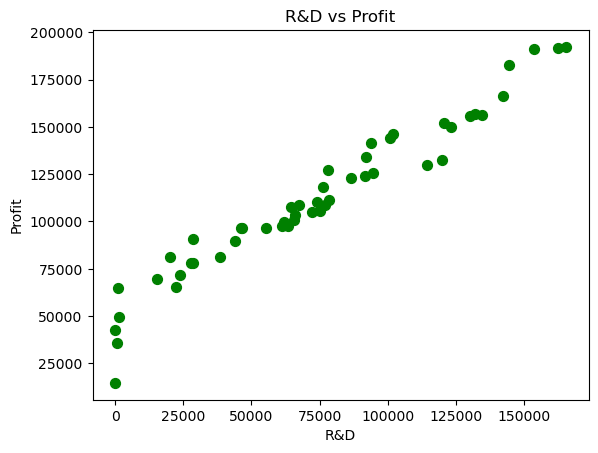

In [2]:
import matplotlib.pyplot as plt

#Plot R&D vs Profit
x1 = df.iloc[:, 0].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

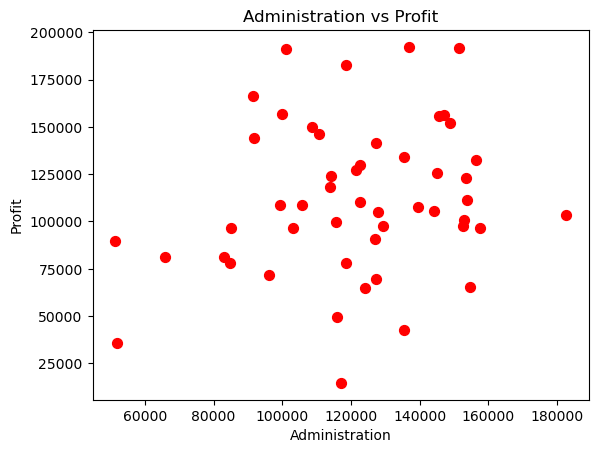

In [6]:
#Plot Administration vs Profit
x1 = df.iloc[:, 1].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()

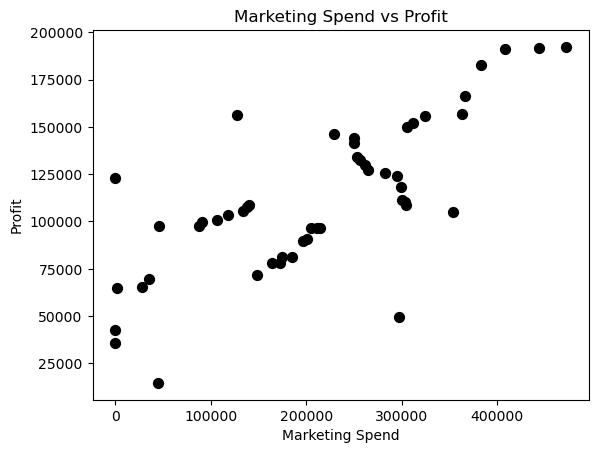

In [7]:
#Plot Marketing Spend vs Profit
x1 = df.iloc[:, 2].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Black',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()

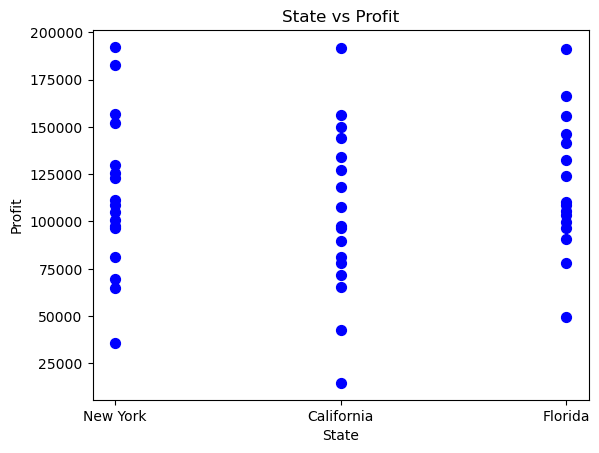

In [8]:
#Plot State vs Profit
x1 = df.iloc[:, 3].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Blue',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()

In [9]:
# Correlation
df.corr()     # R&D Spend and Marketing Spend have high multicollinearity

C:\Users\mukes\AppData\Local\Temp\ipykernel_11868\1735149306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()     # R&D Spend and Marketing Spend have high multicollinearity


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


R&D Spend and Marketing Spend have high correlation Vs Profit

# Estimating Distribution

In [3]:
# Importing Module
from scipy.stats.mstats import normaltest
normaltest(df.Profit.values)

# The normaltest function is used to test the null hypothesis that a sample comes from a normal distribution. 
# The result of the test is returned as a tuple containing a test statistic and a p-value. In the context of normality testing,
# a low p-value typically indicates that the data does not follow a normal distribution.
# If the p-value is below a certain significance level (commonly 0.05), you may reject the null hypothesis that the data
# is normally distributed.

NormaltestResult(statistic=0.017927081855183012, pvalue=0.9910765118444982)

# Profit variable failed to reject hypotheses null of normal distribution since it follows a normal distribution i.e. p-value>0.05. Therefore, residual in normal distribution would be achieved and no need for Transformation.

# Label Encoding

In [4]:
# from sklearn.preprocessing import OneHotEncoder
#Creating dummy variable for State column
new_data=pd.get_dummies(df,columns=['State'])
new_data.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Checking for Outliers

<Axes: >

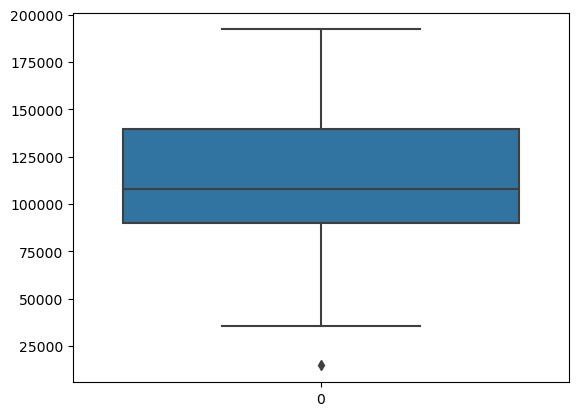

In [5]:
import seaborn as sns      # for building visualizations
sns.boxplot(df["Profit"])

# Removing Outliers 

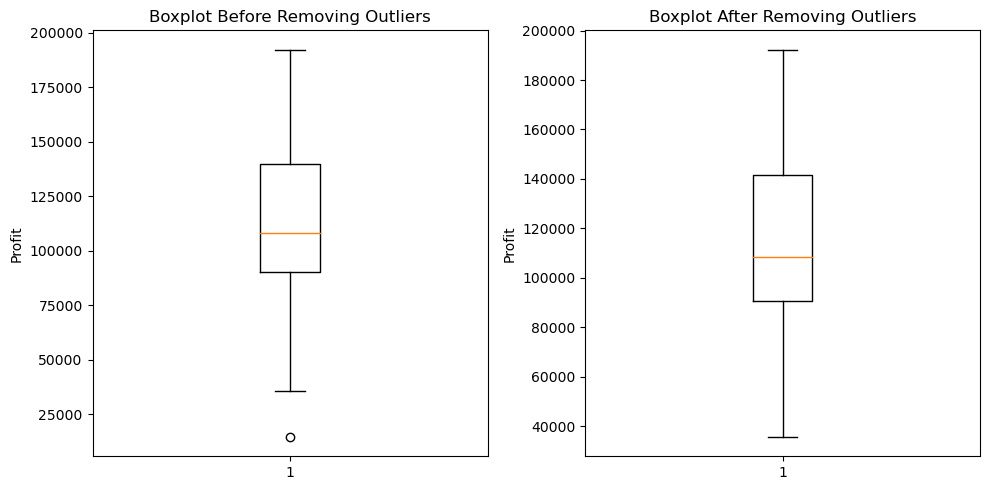

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'Profit' with the actual column name if different
column_name = 'Profit'

# Create a boxplot before removing outliers
plt.figure(figsize=(10, 5))   # Set the size of the figure
plt.subplot(1, 2, 1)    # Create the first subplot (rows, columns, and this is the first subplot)
plt.boxplot(df[column_name])     # Create a boxplot for the data in the specified column

# Set title and labels
plt.title('Boxplot Before Removing Outliers')
plt.ylabel(column_name)

# Calculate the interquartile range (IQR)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
        
# Create a boxplot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers[column_name])
plt.title('Boxplot After Removing Outliers')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

Outlier Removed

# Linear Regression Model

In [6]:
# Importing Module
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and the target variable (y).
X = df.drop('Profit', axis=1)
y = df['Profit']

# Further split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Apply one-hot encoding to the 'State' column
X_train = pd.get_dummies(X_train, columns=['State'])
X_test = pd.get_dummies(X_test, columns=['State'])

# Building and Training Model

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Build and Train the Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # training it on the taining set
# fit() takes trainig data as argument and calulates the parameters on the training data

y_pred = model.predict(X_test)      # trained model
residuals = y_test - y_pred

In [9]:
# Importing model evauluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Measuring each model MSE and MAE 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import r2_score
# Calculate the R^2 value to assess the model's performance
r2 = r2_score(y_test, y_pred)
print(f'R^2 value: {r2}')    

# R2 values range from 0 to 1. A value of 0 indicates that the model does not explain any variability in the dependent variable,
# while a value of 1 indicates a perfect fit where the model explains all the variability.
# A higher R2 value generally indicates a better fit of the model to the data. 

Mean Squared Error: 82010363.04423526
Mean Absolute Error: 6961.47781325024
R^2 value: 0.8987266414329449


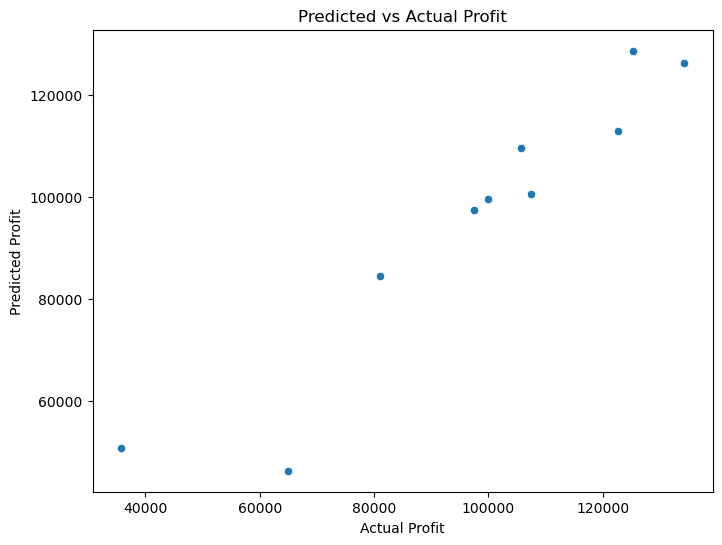

In [19]:
#  Predicted Profit Vs Actual Profit
y_pred = model.predict(X_test)

# Creating scatter plot of predicted vs actual profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs Actual Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

In [20]:
# Display the model coefficients
model.intercept_

54343.29984897952

In [21]:
# Display the model coefficients
model.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -3.15260255e+02,
        6.23532751e+02, -3.08272495e+02])

# Dataframe: Actual Profit, Predicted Profit and Residuals

In [22]:
residuals = y_test - y_pred

# Create a DataFrame with predicted, actual, and residual values
results_df = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': y_pred,
    'Residuals': residuals
})

# Display the table
print(results_df.head(4))  

    Actual Profit  Predicted Profit     Residuals
13      134307.35     126362.879083   7944.470917
39       81005.76      84608.453836  -3602.693836
30       99937.59      99677.494251    260.095749
45       64926.08      46357.460686  18568.619314


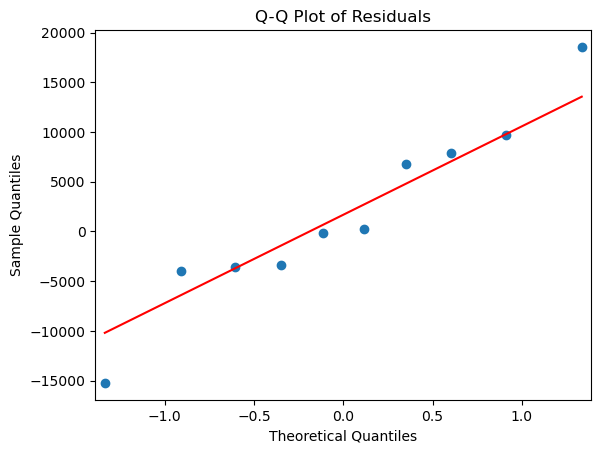

Normality Test p-value: 0.841780519462246


C:\Users\mukes\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# Create a Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')      # sm.qqplot is used to create the Q-Q plot. 
plt.title('Q-Q Plot of Residuals')  # The line='s' argument adds a standardized line to the plot.
plt.show()

# You can also perform a formal normality test
stat, p_value = stats.normaltest(residuals)
print(f"Normality Test p-value: {p_value}")

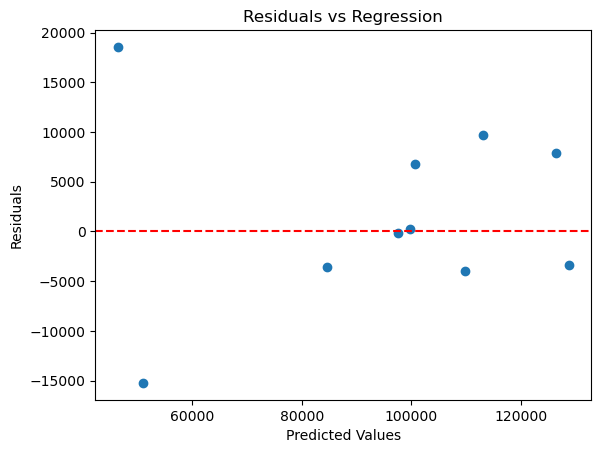

In [24]:
# Residuals vs Regression
# This plot helps you check for the presence of any patterns in the residuals, indicating non-linearity or other issues.# 
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Residual Plot for Homoscedasticity

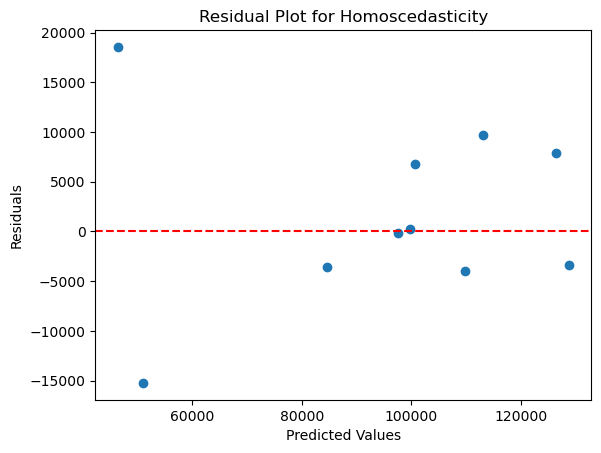

In [25]:
# Check for constant variance of residuals across different levels of the predicted values.
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# High Influence Points

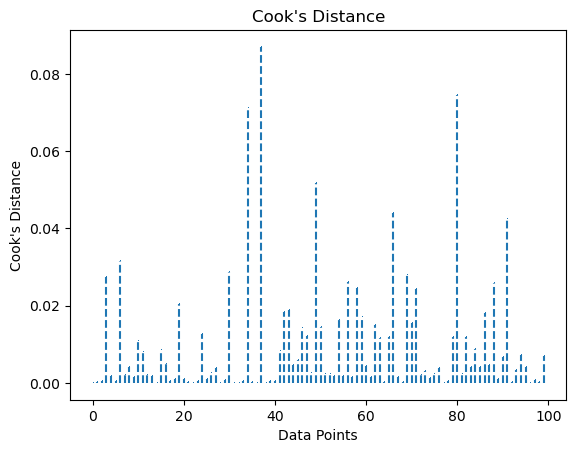

Influential Points: [34 37 49 66 80 91]


In [26]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.normal(0, 2, (100, 1))

# Fit a linear regression model
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Calculate Cook's distance
influence = model.get_influence()
cook_distance = influence.cooks_distance[0]

# Plot Cook's distance
plt.stem(cook_distance, markerfmt=",", linefmt='--', basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel('Data Points')
plt.ylabel("Cook's Distance")
plt.show()

# Identify influential points based on Cook's distance (e.g., Cook's distance > 4 / n)
threshold = 4 / X.shape[0]
influential_points = np.where(cook_distance > threshold)
print("Influential Points:", influential_points[0])